In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.io import show


Loading BokehJS ...

In [4]:
df = pd.read_csv('loanapp.csv')
df

,Sr no,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,1,True,white,reject,1,128,74,1.0,1.0,False,4583,160.0,52.0,2,2,False,2,male
1,2,False,white,approve,1,128,84,1.0,0.0,False,2666,143.0,37.0,2,2,False,2,male
2,3,True,white,approve,1,66,36,1.0,0.0,True,3000,110.0,19.0,2,6,True,2,male
3,4,True,white,approve,1,120,59,1.0,0.0,False,2583,134.0,31.0,2,1,False,1,male
4,5,False,white,approve,1,111,63,1.0,0.0,False,2208,138.0,169.0,2,6,False,2,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1984,True,white,approve,1,158,96,1.0,0.0,False,5000,176.0,15.0,2,1,False,2,male
1984,1985,True,white,approve,1,35,169,1.0,0.0,False,9583,315.0,64.0,1,1,False,1,male
1985,1986,True,white,approve,2,225,49,2.0,0.0,True,4159,225.0,10.0,2,1,False,3,male
1986,1987,False,white,approve,1,98,110,1.0,0.0,True,9200,215.0,427.9,1,1,False,1,male


Loan applications: loanapp.csv . The dataset contains data on loan applications to a bank, including various types of information on the applicant and the purpose of the loan, along with the eventual loan decision (approve or reject - see the column loan_decision).

In [5]:
# Descriptive statistics of the dataframe
df.describe()

,Sr no,occupancy,loan_amount,applicant_income,num_units,num_dependants,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,property_type
count,1988.000000,1988.000000,1988.000000,1988.000000,1984.000000,1985.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,994.500000,1.031690,143.272636,84.684105,1.122480,0.771285,5195.220825,196.304088,4620.333873,1.708249,2.110161,1.861167
std,574.030487,0.191678,80.531470,87.079777,0.437315,1.104464,5270.360946,128.136030,67142.936043,0.555335,1.663256,0.535448
min,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,25.000000,0.000000,1.000000,1.000000,1.000000
25%,497.750000,1.000000,100.000000,48.000000,1.000000,0.000000,2875.750000,129.000000,20.000000,1.000000,1.000000,2.000000
50%,994.500000,1.000000,126.000000,64.000000,1.000000,0.000000,3812.500000,163.000000,38.000000,2.000000,1.000000,2.000000
75%,1491.250000,1.000000,165.000000,88.000000,1.000000,1.000000,5594.500000,225.000000,83.000000,2.000000,2.000000,2.000000
max,1988.000000,3.000000,980.000000,972.000000,4.000000,8.000000,81000.000000,1535.000000,1000000.000000,4.000000,6.000000,3.000000


The basic descriptive statistics of each column is shown in the table . The mean loan amount of all applicants is 143.3. Whereas the mean amount of applicants is only 980 the minimum loan amount is 2.

In [7]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sr no                    1988 non-null   int64  
 1   married                  1985 non-null   object 
 2   race                     1988 non-null   object 
 3   loan_decision            1988 non-null   object 
 4   occupancy                1988 non-null   int64  
 5   loan_amount              1988 non-null   int64  
 6   applicant_income         1988 non-null   int64  
 7   num_units                1984 non-null   float64
 8   num_dependants           1985 non-null   float64
 9   self_employed            1988 non-null   bool   
 10  monthly_income           1988 non-null   int64  
 11  purchase_price           1988 non-null   float64
 12  liquid_assets            1988 non-null   float64
 13  mortage_payment_history  1988 non-null   int64  
 14  consumer_credit_history 

## 3. Build a graph visualizing (some of) the numerical variables of the dataset

<AxesSubplot: xlabel='loan_amount', ylabel='applicant_income'>

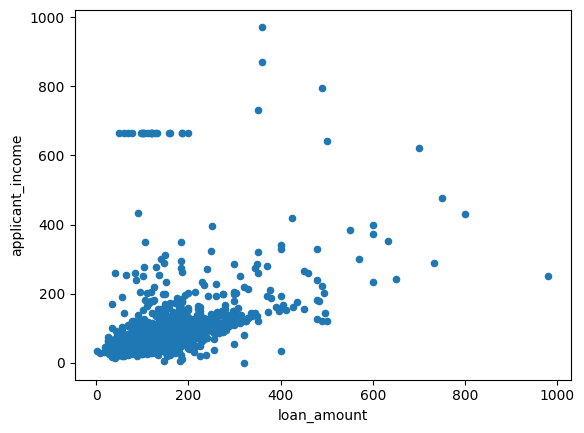

In [9]:
#Plot the numerical variables 'loan_amount' and 'applicant_income'
df.plot(kind="scatter", x="loan_amount", y="applicant_income")

The plot is plotted between loan amount and applicant income in order to visualise the relation between the applicants income and the amount of loan they are seeking

# 4. Check if any records in the data have any missing values; handle the missing data as appropriate (interpolate missing values, delete records with missing values etc).

In [10]:
# Print if there are any empty cells in 'married' column
print (df['married'])
print(df['married'].isnull())

0        True
1       False
2        True
3        True
4       False
        ...  
1983     True
1984     True
1985     True
1986    False
1987    False
Name: married, Length: 1988, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
1983    False
1984    False
1985    False
1986    False
1987    False
Name: married, Length: 1988, dtype: bool


In [11]:
# Print if there are any empty cells in 'num_dependants' column
print(df['num_dependants'])
print(df['num_dependants'].isnull())

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
Name: num_dependants, Length: 1988, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1983    False
1984    False
1985    False
1986    False
1987    False
Name: num_dependants, Length: 1988, dtype: bool


In [12]:
# Print if there are any empty cells in 'gender' column
print(df['gender'])
print(df['gender'].isnull())

0         male
1         male
2         male
3         male
4         male
         ...  
1983      male
1984      male
1985      male
1986      male
1987    female
Name: gender, Length: 1988, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
1983    False
1984    False
1985    False
1986    False
1987    False
Name: gender, Length: 1988, dtype: bool


In [13]:
#Total missing values for each features
print(df.isnull().sum())

Sr no                       0
married                     3
race                        0
loan_decision               0
occupancy                   0
loan_amount                 0
applicant_income            0
num_units                   4
num_dependants              3
self_employed               0
monthly_income              0
purchase_price              0
liquid_assets               0
mortage_payment_history     0
consumer_credit_history     0
filed_bankruptcy            0
property_type               0
gender                     14
dtype: int64


The missing values can be found either by checking each column or by just searching for the number of null values in the whole Dataframe. This shows that marital status of 3 applicants , number of units of 4 applicants, number of dependents of 3 applications and gender of 14 applicants are missing.

In [14]:
# Dataframe rows with missing values
df.dropna(inplace=True, axis="rows")
df

,Sr no,married,race,loan_decision,occupancy,loan_amount,applicant_income,num_units,num_dependants,self_employed,monthly_income,purchase_price,liquid_assets,mortage_payment_history,consumer_credit_history,filed_bankruptcy,property_type,gender
0,1,True,white,reject,1,128,74,1.0,1.0,False,4583,160.0,52.0,2,2,False,2,male
1,2,False,white,approve,1,128,84,1.0,0.0,False,2666,143.0,37.0,2,2,False,2,male
2,3,True,white,approve,1,66,36,1.0,0.0,True,3000,110.0,19.0,2,6,True,2,male
3,4,True,white,approve,1,120,59,1.0,0.0,False,2583,134.0,31.0,2,1,False,1,male
4,5,False,white,approve,1,111,63,1.0,0.0,False,2208,138.0,169.0,2,6,False,2,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1984,True,white,approve,1,158,96,1.0,0.0,False,5000,176.0,15.0,2,1,False,2,male
1984,1985,True,white,approve,1,35,169,1.0,0.0,False,9583,315.0,64.0,1,1,False,1,male
1985,1986,True,white,approve,2,225,49,2.0,0.0,True,4159,225.0,10.0,2,1,False,3,male
1986,1987,False,white,approve,1,98,110,1.0,0.0,True,9200,215.0,427.9,1,1,False,1,male


The values can be replaced with "NA" with replace function or interpolated with the values nearby the missing values. But here the rows with missing values have been deleted since the change in categorical variables would affect the analysis in the later part of the report . After deleting the rows with missing values 1969 out of 1988 rows are remaining.

## 5. Display the distribution of(some of) numerical variables as histograms . Provide verbal comments on the graph

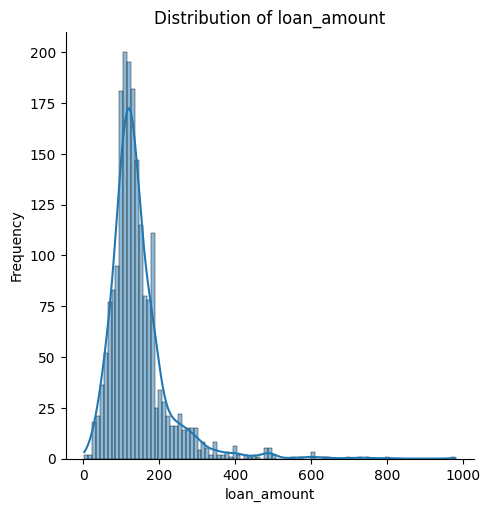

In [15]:
sns.displot(df['loan_amount'], kde=True)
plt.title('Distribution of loan_amount')
plt.xlabel('loan_amount')
plt.ylabel('Frequency')
plt.show()

The above histogram shows the distribution of loan amount of the applicants.

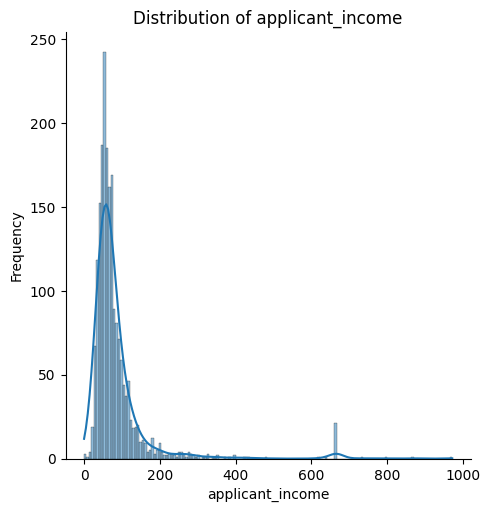

In [16]:
# Histogram for Applicant income of the applicant

sns.displot(df['applicant_income'], kde=True)
plt.title('Distribution of applicant_income')
plt.xlabel('applicant_income')
plt.ylabel('Frequency')
plt.show()

The above histogram shows the distribution of the income of the applicants.

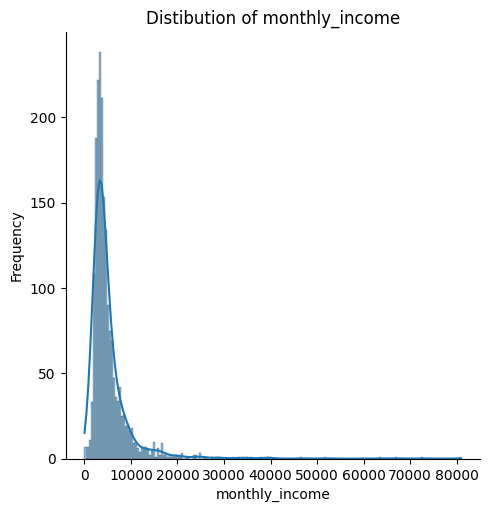

In [17]:
#Histogram for monthly income of the applicant
sns.displot(df['monthly_income'],kde=True)
plt.title('Distibution of monthly_income')
plt.xlabel('monthly_income')
plt.ylabel('Frequency')
plt.show()

The above histogram shows the distribution of the monthly income of the applicants.

## 6. Display unique values of a categorical variable

In [18]:
# Find all the unique values in a race column(Unique races)
df.race.unique()

array(['white', 'black', 'hispan'], dtype=object)

White, Black and Hispan are the different types of races of the applicants.

In [19]:
#Find all the unique values in the loan amount column
df.loan_amount.unique()

array([128,  66, 120, 111, 141, 276, 100, 267, 175,  95, 158, 110,  40,
        70, 168, 114, 349, 185, 126, 125, 130, 109, 200,  17, 208, 187,
        76, 121, 133, 140, 115, 252, 104, 315, 116, 632, 112,  78, 151,
       152,  59, 147,  80, 280, 310, 345,  90, 191, 123, 122,  68, 134,
        72, 138, 248,  99,   2, 132, 162, 150,  94,  35,  50, 180, 732,
       201, 183, 170, 166,  74, 124, 106, 131, 320, 192, 101, 155, 300,
       235,  65, 144, 135, 184, 149, 450,  47,  48, 160,  75,  28, 350,
        85,  91,  96,  88,  44,  56, 182,  86, 129, 105, 137, 290, 199,
       148, 237,  53,  49, 275,  57, 230,  83,  26, 108, 286,  55,  97,
       287, 164, 145, 176, 165, 304, 136, 258, 156,  84, 312, 190, 172,
        82,  93,  81, 113, 118,  60, 167,  98, 265, 264,  87, 210,  71,
       146,  30,  25,  89,  92, 188, 203, 240, 189, 102, 297, 281, 107,
       278, 225, 400, 139, 216, 232, 127,  79, 490, 154, 186, 224, 159,
       163, 259, 360, 153, 322, 194, 207, 257, 370, 650,  77, 11

The above list are of the unique loan amounts of the applicants in $1000s.

## 7. Build a consistency table of two potentially related categorical variables. Conduct a statistical test of the independence between the variables. Provide verbal comments on the output.

The contingency table represents the observed frequencies of co-occurrences of different categorical variables.

In [21]:
# Contingency Table for the categorical variables 'race' and 'loan_decision'
cont_table1 = pd.crosstab(df['race'],df['loan_decision'])
cont_table1

loan_decision,approve,reject
race,,
black,131,64
hispan,82,26
white,1514,152


<AxesSubplot: xlabel='race'>

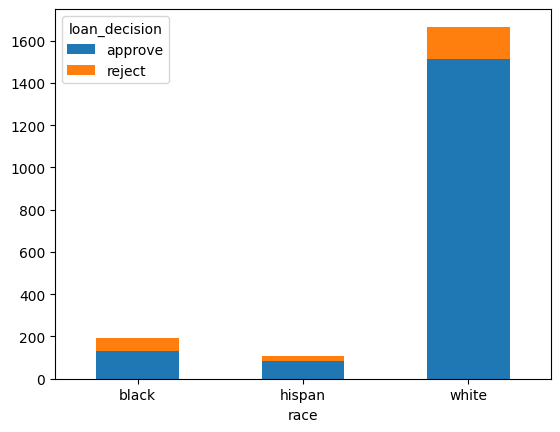

In [22]:
# Plot Contingency Table 1
cont_table1.plot(kind="bar", stacked=True, rot=0)

The Contingency table 1 show how often different values of the categorical variables 'race' and 'loan_decision' occur. It Shows that 1514 white, 82 hispan, 131 black applicants have been approved with their loans. Whereas 152 white, 26 hispan, 64 black applicants have been rejected with their applications.

In [23]:
# Contingency table for the categorical variables 'gender' and 'loan_decision'
cont_table2 = pd.crosstab(df['gender'], df['loan_decision'])
cont_table2

loan_decision,approve,reject
gender,,
female,318,50
male,1409,192


<AxesSubplot: xlabel='gender'>

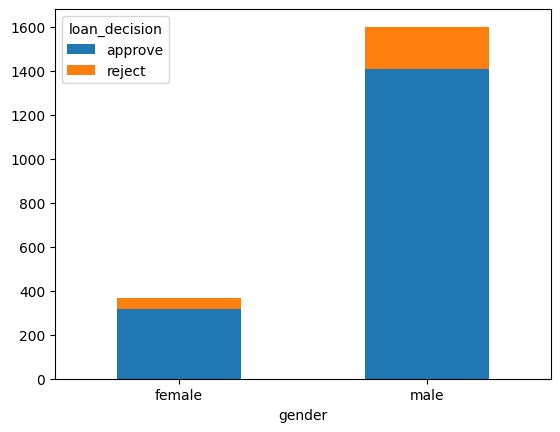

In [24]:
# Plot Contingency table 2
cont_table2.plot(kind="bar", stacked=True, rot=0)

The contingency table 2 show how often different values of the categorical variables 'gender' and 'loan_decision' cooccur. It shows that 1409 male and 318 female applicant have been approved with their loans Whereas 192 male and 50 female applicants have been rejected with their applications.

In [26]:
# Contingency table for the categorical variables 'self-employed and 'loan'
cont_table3=pd.crosstab(df['self_employed'],df['loan_decision'])
cont_table3

loan_decision,approve,reject
self_employed,,
False,1510,202
True,217,40


<AxesSubplot: xlabel='self_employed'>

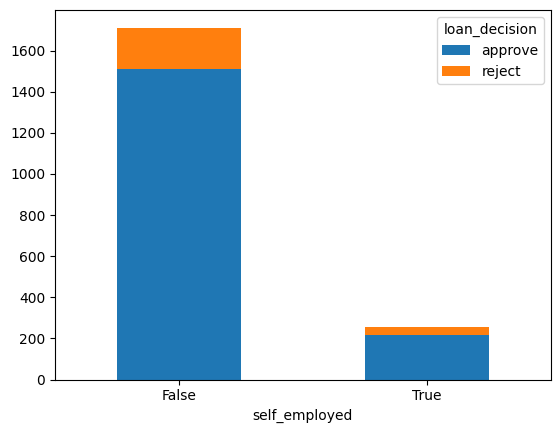

In [27]:
#Plot contingency table 3
cont_table3.plot(kind="bar", stacked=True, rot=0)

The contingency table 3 show hoe often different value of the categorical variables 'self_employed' and 'loan_decision' co-occur. It shows that 217 self-employed and 1510 not self-employed applicants have been approved with their loans. Whereas 40 self-employed and 202 non self-employed applicants have been rejected with their applications.

In [28]:
# Contingency table for the categorical variables 'married' and 'loan_decision'
cont_table4 = pd.crosstab(df['married'],df['loan_decision'])
cont_table4


loan_decision,approve,reject
married,,
False,569,102
True,1158,140


<AxesSubplot: xlabel='married'>

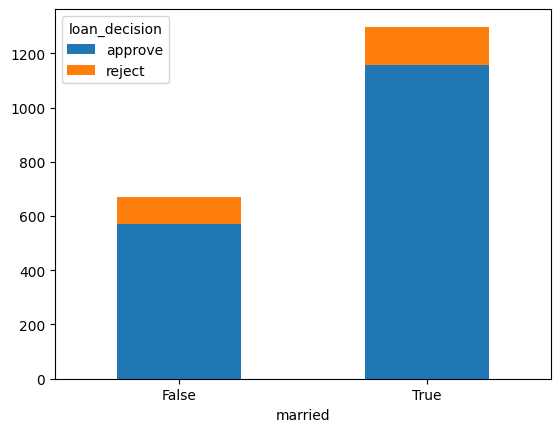

In [29]:
#Plot contingency 4
cont_table4.plot(kind="bar", stacked=True, rot=0)

The Contingency table 4 show how often different values of the categorical variables 'married' and 'loan_decision' co-occur. It shows that 1158 married and 569 unmarried applicants have been approved with their loans . Whereas 140 married and 102 unmarried applicants have been rejected with their applications.

In [30]:
# Run chi2 test on Contingency table 1
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table1)
print(f"p-value: {p_val}")

p-value: 1.1422552252120337e-23


The p-value is less than the usual significance level of 0.05. Therefore, we need to reject the null hypothesis that there is no dependence between the race and loan decision. Therefore the loan of applicants is approved or rejected based on theor race.

In [31]:
# Run chi2 test on contingency table 2
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table2)
print(f"p-value:{p_val}")

p-value:0.45204922056492614


The p-value is greater than the usual significance level of 0.05. Therefore, we do not need to reject the null hypothesis that there is no dependence between the gender and loan decision. Therefore the loans of applicants is not approved or rejected based on their gender.

In [32]:
# Run chi2 test on Contingency Table 3
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table3)
print(f"p-value: {p_val}")

p-value: 0.10688538967672206


The p-value is greater than the usual significance level of 0.05. Therefore, we do not need to reject the null hypothesis that there is no dependence between the employment status and loan decision. Therefore the loans of applicants is not approved or rejected based on their employment status, if they are self employed or not.

In [33]:
# Run chi2 test on Contingency Table 4
chi2, p_val, dof, expected = stats.chi2_contingency(cont_table4)
print(f"p-value: {p_val}")

p-value: 0.0058521778331842664


The p-value is less than the usual significance level of 0.05. Therefore, we need to reject the null hypothesis that there is no dependence between the marital status and loan decision. Therefore the loans of applicants is approved or rejected based on their marital status, if they are married or not.

## 8. Retrieve a subset of the data based on two or more criteria and present descriptive statistics on the subset. Provide verbal comments on the output.

In [34]:
# Retrieve a subset containing 'gender', 'loan-amount', 'applicant_income' and 'loan_decision'
subset = df[['gender','loan_amount','applicant_income','loan_decision']]
subset 

,gender,loan_amount,applicant_income,loan_decision
0,male,128,74,reject
1,male,128,84,approve
2,male,66,36,approve
3,male,120,59,approve
4,male,111,63,approve
...,...,...,...,...
1983,male,158,96,approve
1984,male,35,169,approve
1985,male,225,49,approve
1986,male,98,110,approve


A subset containing the gender, loan amount, applicant income and loan decision of the applicants has been created

In [35]:
# Descriptive statistics of the subset retrieved
subset.describe()

,loan_amount,applicant_income
count,1969.000000,1969.000000
mean,143.505333,84.908075
std,80.802291,87.439115
min,2.000000,0.000000
25%,100.000000,48.000000
50%,126.000000,64.000000
75%,165.000000,88.000000
max,980.000000,972.000000


The basic descriptive statistics of the columns loan amount and applicant income are shown in the table. The mean loan amount of all applicants is 143.5, whereas the mean income of all applicants is only 84.9. The maximum loan amount from the dats is 980, whereas the minimum loan amount from the data is 2

## 9. Conduct a statistical test of the significance of the difference between the means of two subsets of the data. Provide verbal comments.

Independent Sample test 1

In [36]:
# Se;ect the loan amount of 'male'
m = df[subset['gender']=='male']['loan_amount']
# mean loan amount
m.mean()

148.79325421611492

In [37]:
#Select the loan amount of female
f = df[subset['gender']== 'female']['loan_amount']
#mean loan amount
f.mean()

120.5

The first Independent sample t-test is conducted to determine if there is a significant difference between the means of the population gender, male and female. Here "m" is taken as the mean loan amount of all male applicants . Similarly "f" for all female applicants. Here the null hypothesis is that the difference between the means of loan amounts of male and female applicants is 0 or no difference. The alternative hypothesis would be that the means are significantly lower or higher than each other.


In [38]:
# Calculate the test statistic
t_val, p_val = stats.ttest_ind(m,f)
print(f"t-value: {t_val}, p-value: {p_val}")

t-value: 6.112681794453549, p-value: 1.1782503145167685e-09


Here the p-value is less than the signifance level 0.05 (p-value < 0.05) Therefore we reject the null hypothesis that mean loan amount of males is not different from females.

Independent Sample t-test 2

In [39]:
# Selct the applicant income of approved loans
a = df[subset['loan_decision'] == 'approve']['applicant_income']

# mean applicant income
a.mean() 

84.10191082802548

In [40]:
# Select the applicant income of rejected loans
r = df[subset['loan_decision'] == 'reject']['applicant_income']
# mean applicant income
r.mean()

90.66115702479338

The second Independent sample t-test is conducted to determine if there is a significant difference between the means of the population loan decisions. Here "a" is taken as the mean applicant income of approved loans.Similarly "r" for all rejected loans. Here the null hypothesis is that the difference between the means of approved and rejected loans is 0 or no difference. The alternative hypothesis would be that the means are significantly lower or higher than each other.

In [41]:
# Calculate the test statistic
t_val, p_val = stats.ttest_ind(a,r)
print(f"t-value: {t_val}, p-value: {p_val}") 

t-value: -1.0929508672464752, p-value: 0.27454920793283455



Here the p-value is greater than the signifance level 0.05 (p-value < 0.05) Therefore we do not need to reject the null hypothesis that mean loan applicant income of approved loans is different from the mean applicant income of rejected loans.

## 10. Create pivot tables, i.e., create a table that groups the data by a certain categorical variable and displays summaries for each categorical variable. Provide verbal comments.

In [42]:
# Create Pivot tables between categorical variables 'gender' and 'loan_amount'
pivot1 = df.pivot_table(index=['gender'], values=['loan_amount'], aggfunc='mean')
pivot1

,loan_amount
gender,
female,120.500000
male,148.793254


Pivot Table 1 is used to represent the summarise the categorical variable 'loan_amount' in relation to 'gender'. It shows that the average loan amount of female applicants is 120.5. Whereas the average loan amount of male applicants is 148.8.

In [43]:
# Create Pivot tables between categorical variables 'married' and 'loan_amount'
pivot2 = df.pivot_table(index=['married'], values=['loan_amount'], aggfunc='mean')
pivot2 

,loan_amount
married,
False,122.991058
True,154.110169


Pivot Table 2 is used to represent the summarise the categorical variable 'loan_amount' in relation to 'gender'. It shows that the average loan amount of unmarried applicants is 122.9.Whereas the average loan amount of male applicants is 154.1.

In [44]:
# Create Pivot tables between categorical variables 'race' and 'loan_amount'
pivot3 = df.pivot_table(index=['race'], values=['loan_amount'], aggfunc='mean')
pivot3 

,loan_amount
race,
black,136.630769
hispan,130.777778
white,145.135054



Pivot Table 3 is used to represent the summarise the categorical variable 'loan_amount' in relation to 'gender'. It shows that the average loan amount of white applicants is 145.1. Whereas the average loan amount of black and hispan applicants are 136.6 and 130.7.

In [45]:
# Create Pivot tables between categorical variables 'self_employed' and 'loan_amount'
pivot4 = df.pivot_table(index=['self_employed'], values=['loan_amount'], aggfunc='mean')
pivot4 

,loan_amount
self_employed,
False,138.962033
True,173.770428


Pivot Table 4 is used to represent the summarise the categorical variable 'loan_amount' in relation to 'gender'. It shows that the average loan amount of not self-employed applicants is 138.9. Whereas the average loan amount of self − employed applicants is 173.7


## 11. Implement a linear regression model and interpret its output.

In a simple linear regression model, we’d like to predict the loan amount of a loan applicant from the average income of the applicants applyied for the loan. That is, loan amount is the dependent variable (Y) and applicant income is the independent variable (X).

In [46]:
#  Visualize relationship between 'applicant_income' and 'loan_amount'
fig = figure(height=400, width=400)
fig.circle(df['applicant_income'], df['loan_amount'])
show(fig)

The visualisation shows the relationship between the loan amount and income of the applicants. The plots are scatter throughout the plane and are also congested at a part of the plane.

In [47]:
# Check Correlation between 'applicant_income' and 'loan_amount'
df['applicant_income'].corr(df['loan_amount'], method='pearson')

0.43271137519859765

The Pearson correlation coeefficient also shows that there is a positive relationship between them.

In [48]:
# Create a model to build linear regression
model = sm.OLS.from_formula('loan_amount ~ applicant_income', data=df).fit() 

In [49]:
# Obtain slope and intercept
intercept, slope = model.params
print(intercept)
print(slope)

109.5533428265654
0.39986761875832794


In [50]:
# Obtain the predicted values
y_pred = [slope*i + intercept  for i in df['applicant_income']] 

In [51]:
# Plot the fitted line
fig = figure(height=400, width=400)
fig.circle(df['applicant_income'], df['loan_amount'])
fig.line(df['applicant_income'], y_pred, color='red')
show(fig) 

The slope and intercept of a fitted line was found and then their predicted values were found which were used to plot the fitted line on the plot which seems to carry the relationship of the categorical variables.

In [52]:
# Access the model summary for interpretation
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     453.1
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           1.16e-90
Time:                        23:12:03   Log-Likelihood:                -11237.
No. Observations:                1969   AIC:                         2.248e+04
Df Residuals:                    1967   BIC:                         2.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          109.5533      2.289     47.857      0.000     105.064     114.043
applicant_income     0.3999      0.019     21.287      0.000       0.363       0.437
==============================================================================
Omnibus:                      988.563   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18486.530
Skew:                           1.914   Prob(JB):                         0.00
Kurtosis:                      17.515   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coeffcient on the variables: The "coef" column shows the actual coefficients: 109.5533 for the intercept, and 0.3999 for the SAT variable. Thus, our model is described by the line: loan_amount= 109.5533 + 0.3999 ∗ applicant_income + e.



Significance of the variables: The summary includes results of a t-test assessing if the estimated coeffients are significantly different from 0. Since they are not different from 0, it would mean that the variable has no effect on the dependent variable, and can be deleted from the model.



Quality of the model: The R^2 and the adjusted R^2 values both are same and around 0.2(0.187). It means that there are many more factors that affect loan amount which our model did not take into account.